<h3> In This tutorial, we will work with one categorical variable that will divide our data into 3 groups and we will calculate and analyze the differences in means between these three groups using One-way ANOVA </H3>

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import scale 
import numpy as np 
import researchpy as rp
%matplotlib inline 

In [2]:
#we will use the bike sharing data set
df_bike = pd.read_csv('python/hypothesis testing/02/demos/datasets/bike_sharing_data_processed.csv')

In [3]:
df_bike.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [4]:
df_bike.shape

(731, 7)

<h4> The column of interest is the "Weather Situation Column" which has three categories</h4>

In [5]:
df_bike['weathersit'].unique()

array([2, 1, 3], dtype=int64)

<H3> Assumptions of anova: variance among all groups must be equal, the residual must be normally distributed, no multicollinearity </h3> 

<h3> visualize the categories </h3> 

In [15]:
#distribution of the categories 
df_bike['weathersit'].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

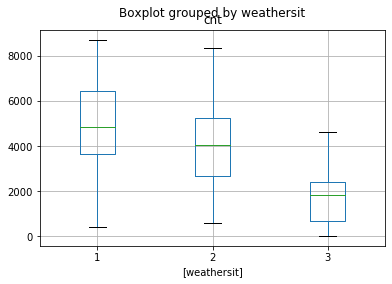

In [14]:
df_bike.boxplot(column= ['cnt'], by  = ['weathersit']);

<H3> we need to test all the assumptions of ANOVA </h3>

<h4> Split the target along the categories of interest </h4> 

In [17]:
sample_1 = df_bike[df_bike['weathersit'] == 1]
sample_2 = df_bike[df_bike['weathersit'] == 2]
sample_3 = df_bike[df_bike['weathersit'] == 3]

<h4> Variance test </h4> 

In [18]:
stats.levene(sample_1['cnt'], sample_2['cnt'], sample_3['cnt'])

LeveneResult(statistic=2.967546907330999, pvalue=0.05205181364100545)

<H4> From the above, the variance of all the categories are equal </h4> 

<h3> We test for normal distribution </h3> 

In [32]:
y = df_bike[['cnt']]
x = df_bike[['weathersit']]

In [44]:
mod = sm.OLS(y, x).fit()

In [45]:
residue = mod.resid

In [46]:
stats.shapiro(residue)

(0.9773649573326111, 3.2847133901725556e-09)

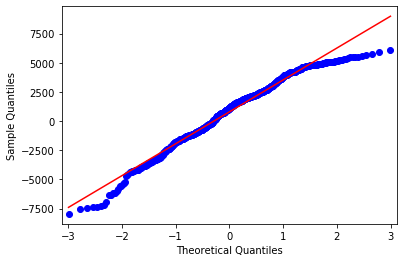

In [47]:
sm.qqplot(residue, line = 'r')
plt.show();

<h4> The categories are not normally distributed. But we will proceed nonetheless </h4> 

<H3> implement the ANOVA model </h3> 

In [49]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [55]:
model = ols('cnt~weathersit', data = df_bike).fit()

In [56]:
sm.stats.anova_lm(model, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
weathersit,1.0,2.422888e+08,2.422888e+08,70.729298,2.150976e-16
Residual,729.0,2.497247e+09,3.425578e+06,NaN,NaN


<h3> Implement two way anova below </h3> 

In [59]:
model2 = ols('cnt~weathersit+workingday+(weathersit*workingday)', data = df_bike).fit()

In [60]:
sm.stats.anova_lm(model2, typ = 2)

,sum_sq,df,F,PR(>F)
weathersit,2.493597e+08,1.0,73.236168,6.799793e-17
workingday,1.731697e+07,1.0,5.085942,2.441720e-02
weathersit:workingday,4.588603e+06,1.0,1.347659,2.460689e-01
Residual,2.475341e+09,727.0,NaN,NaN


<H3> Note: when performing two way anova, always add the interaction term </h3> 

<h3> Interpretation </h3> 

<H4> the variance between the number of bikes rented based on the weathersit is statisticall significant </h4> 
<h4> the variance between the number of bikes rented based on the working day is statistically significant </h4> 
<h4> there is no interaction between weathersit and working day </h4> 

<h3> perform the one-way anova test using the stats algorithm </h3> 

In [61]:
stats.f_oneway(sample_1['cnt'], sample_2['cnt'], sample_3['cnt'])

F_onewayResult(statistic=40.06604492024684, pvalue=3.106317270053755e-17)